# cleaning, EDA, ML 

### Importing Libraries
the next block will be responsible for installing and importing the necessary libraries and functions for this section.

In [1]:
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import math
import time
import random
import datetime
import os
import numpy as np
import matplotlib.pyplot as plt      
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline



## cleaning
After we got the data from https://n12.co.il we clean it
1. We will keep the types: פוליטי, ביטחוני, פלילי, בעולם, תרבות
2. We will drop all the duplicates URL and keep only the first one
3. We will replace all -1 to 0
4. We will remove rows where any column contains -1 as a numeric value
5. We will change the type of: Views, Interesting to 'int64'
6. We will delete the numbered columns

In [3]:
# Read the articles from the CSV
articles_df = pd.read_csv("articles.csv")


allowedTypes = ['פוליטי', 'ביטחוני', 'פלילי', 'בעולם', 'תרבות']
filtered_df = articles_df[articles_df['Type'].isin(allowedTypes)]


filtered_df = filtered_df.drop_duplicates(subset='URL', keep='first')


filtered_df=filtered_df.replace({'Comments': {-1:0}})
filtered_df=filtered_df.replace({'Interesting': {"-1":0}})
filtered_df=filtered_df.replace({'Not Interesting': {-1:0}})
filtered_df = filtered_df.replace("-1", -1)


filtered_df = filtered_df.loc[~(filtered_df == -1).any(axis=1)]
filtered_df = filtered_df.dropna()
filtered_df['Views'] = filtered_df['Views'].str.replace(',', '').astype("int64")
filtered_df['Interesting'] = filtered_df['Interesting'].astype(str).str.replace(',', '').astype("int64")


filtered_df = filtered_df.drop(columns = ['Unnamed: 0'], axis = 1)
filtered_df = filtered_df.drop(columns = ['Unnamed: 0.1'], axis = 1)


filtered_df.to_csv("cleaned_articles.csv", encoding="utf-8-sig", index=False)

In [4]:
filtered_df

,Name,Type,Date,Time,Views,Comments,Interesting,Not Interesting,URL
3,מהומה בבוסטון: מפגין ניסה להתקרב לשר ברקת ונהד...,פוליטי,08/06/2023,17:31,22643,62,502,72,https://www.mako.co.il/news-politics/2023_q2/A...
4,"""אם רה""מ מעוניין להדיח אותי מתפקידי - שיתכבד"":...",פוליטי,08/06/2023,14:44,54628,39,1165,64,https://www.mako.co.il/news-politics/2023_q2/A...
5,"יו""ר הקואליציה אופיר כץ מאיים: ""האופוזיציה תבי...",פוליטי,08/06/2023,10:13,21065,12,372,46,https://www.mako.co.il/news-politics/2023_q2/A...
6,"""בכל פעם שלוין וזוהר אומרים 'אנחנו נתפטר', זה ...",פוליטי,08/06/2023,08:20,21151,37,297,24,https://www.mako.co.il/news-politics/2023_q2/A...
7,"שר הכלכלה וההבטחה לבנקאים האמריקנים: ""הרפורמה ...",פוליטי,08/06/2023,06:21,9495,9,266,23,https://www.mako.co.il/news-politics/2023_q2/A...
...,...,...,...,...,...,...,...,...,...
5423,"""הוא למעשה אנס אותי בזמן הקליפ"": עדות חדשה כנג...",תרבות,24/01/2022,19:37,68555,2,520,138,https://www.mako.co.il/news-entertainment/2022...
5424,"בועז שרעבי מגיב לתקרית בהופעה: ""התרגשתי לקרוא ...",תרבות,24/01/2022,15:41,30546,29,683,23,https://www.mako.co.il/news-entertainment/2022...
5425,"""קיימת עלייה מדאיגה בתקריות אנטישמיות בארה""ב""",תרבות,24/01/2022,14:51,6919,10,3,0,https://www.mako.co.il/news-entertainment/2022...
5426,"""בגידה והסתה"": מה חושבים במדינות ערב על הסרט ה...",תרבות,24/01/2022,13:45,24833,9,255,45,https://www.mako.co.il/news-entertainment/2022...


In [5]:
filtered_df.dtypes

Name               object
Type               object
Date               object
Time               object
Views               int64
Comments            int64
Interesting         int64
Not Interesting     int64
URL                object
dtype: object

## Data Visualizations
In this section we will present visualizations for the data we collected

In [6]:
def pie_chart(data, labels, title):
    fig, ax = plt.subplots(figsize=(6, 6))

    patches, texts, pcts = ax.pie(
        data, labels=labels, autopct=lambda x: '{:.0f}'.format(x*data.sum()/100),
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'large', "weight":"600"},
        radius= 1.15,
        startangle=0)
    
    for i, patch in enumerate(patches):
        texts[i].set_color(patch.get_facecolor())
    plt.setp(pcts, color='white')
    plt.setp(texts, fontweight=600)
    ax.set_title(title, fontsize=18)
    plt.tight_layout()
    
def two_columns_bar_chart(df, column1, column2, title):
    indexes = np.arange(len(df))
    width = 0.4

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.barh(indexes, df[column1], width, color='red', label=column1)
    ax.barh(indexes + width, df[column2], width, color='green', label=column2)
    
    ax.set_title(title, fontsize=18)
    ax.set(yticks=indexes + width, yticklabels=df.iloc[:,0].keys().tolist(), ylim=[2*width - 1, len(df)])
    ax.legend()

    plt.show()


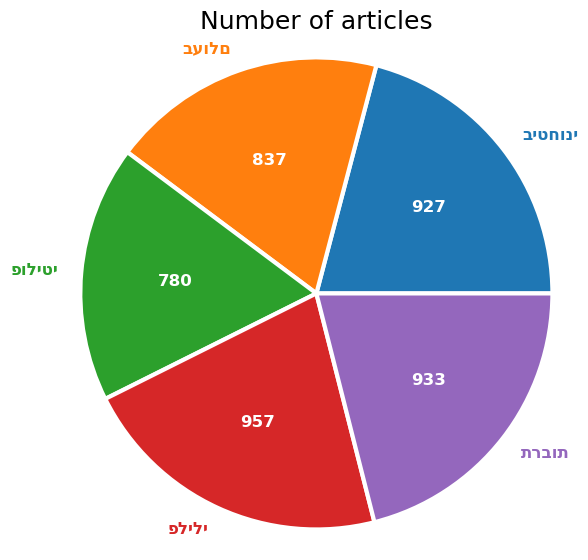

In [7]:
data = filtered_df.groupby(['Type'])['Type'].count()
labels = filtered_df.groupby('Type').groups.keys()

pie_chart(data, labels, "Number of articles")

Text(0, 0.5, 'Views')

Text(0.5, 0, 'Type')

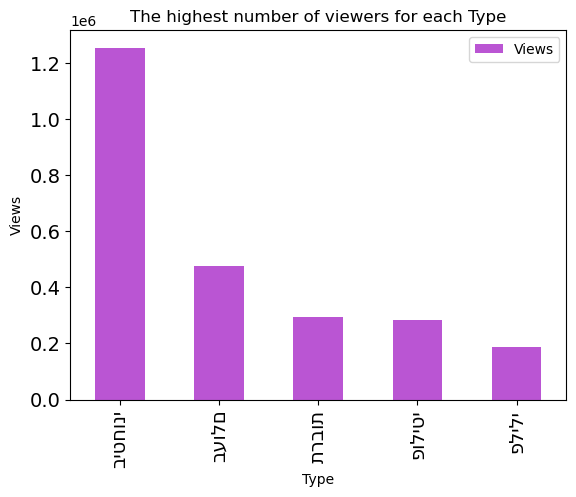

The most viewed article:


,Name,Type,Views,Comments,Interesting,Not Interesting
2134,"מטחים כבדים על גוש דן, תל אביב והשרון; הרוגה מ...",ביטחוני,1253716,207,6334,143
4087,"יועצו של זלנסקי: ""כ-3,500 חיילים רוסים נהרגו א...",בעולם,475302,52,1336,30
5340,"""מרגיש שהיא רוצה להוציא את עצמה טוב על הגב שלו""",תרבות,295166,120,940,1462
244,"""יום ההתנגדות"" | המחאות נגד המהפכה המשפטית נמש...",פוליטי,285001,236,1706,307
2688,חשד לרצח והתאבדות: אלכסנדר סבנוק דקר למוות את ...,פלילי,187011,138,5722,121


In [8]:
df = filtered_df[["Name", "Type", "Views", "Comments", "Interesting", "Not Interesting"]].sort_values("Views", ascending=False).head(35)
df = df.drop_duplicates(subset='Type')
df.plot.bar(x="Type", y="Views",title="The highest number of viewers for each Type",fontsize=14,color = 'mediumorchid').title.set_size(12)
plt.ylabel("Views",fontsize=10)
plt.xlabel("Type",fontsize=10) 
plt.show()
print("The most viewed article:")
df

**Conclusion:** The most viewed article is of a type military

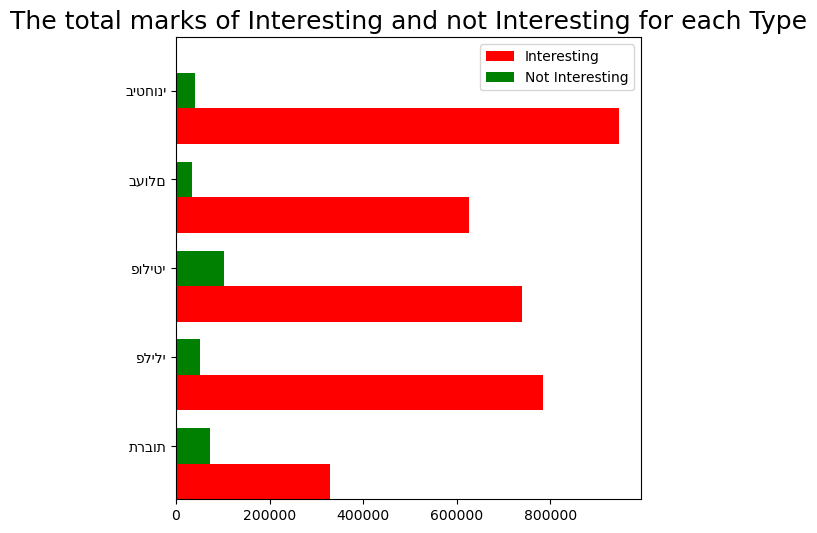

The total amount of: Views, Comments, Interesting, Not Interesting 


,Views,Comments,Interesting,Not Interesting
Type,,,,
תרבות,30097937,21119,328970,72616
פלילי,28760927,25498,785604,51101
פוליטי,29562718,45617,739432,101547
בעולם,26119732,13161,625832,33137
ביטחוני,36091767,26118,946974,41091


In [9]:
df1 = filtered_df[["Type", "Interesting", "Not Interesting"]]
df2 = filtered_df.groupby(['Type']).sum()

Interesting_and_Not_Interesting_review_by_type=df2.sort_values("Type", ascending=False).head(10)


two_columns_bar_chart(Interesting_and_Not_Interesting_review_by_type, "Interesting" , "Not Interesting", "The total marks of Interesting and not Interesting for each Type")
print("The total amount of: Views, Comments, Interesting, Not Interesting ")
Interesting_and_Not_Interesting_review_by_type

Text(0, 0.5, 'Interesting')

Text(0.5, 0, 'Views')

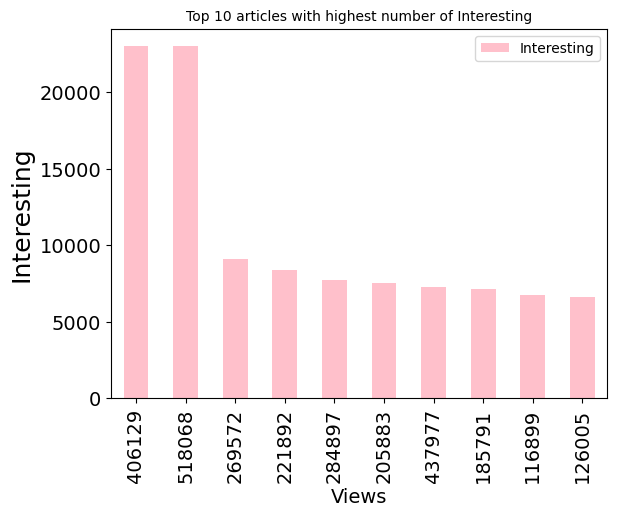

,Name,Type,Views,Interesting
2064,"המהלך של צה""ל: כך נמנע מטח ראווה לתל אביב בשעת...",ביטחוני,406129,23000
1870,זכריה זביידי ואסיר נוסף נלכדו: נמשך המצוד אחר ...,ביטחוני,518068,23000
4899,תאונת הדרכים של נירו לוי | פרטים חדשים,תרבות,269572,9133
948,"בנט ב-CNN: ""מי רוצח את מי?"", המגישה - ""אתה לא ...",פוליטי,221892,8387
1763,יצאו לבלות ונורו למוות: תומר מורד ואיתם מגיני ...,ביטחוני,284897,7747
4307,לאחר שהוזהר ונמלט: המיליארדר הישראלי טדי שגיא ...,בעולם,205883,7519
2107,"צה""ל: ""פגענו באחד הסודות הכי גדולים של חמאס""",ביטחוני,437977,7264
1767,תושב מחנה הפליטים ג'נין: זה המחבל שביצע את הפי...,ביטחוני,185791,7135
129,"מפקדו לשעבר של נתניהו בסיירת מטכ""ל: ""אתה הסרבן...",פוליטי,116899,6761
3238,"אילנה ראדה: אחד התלמידים רצח את תאיר, הפרקליטו...",פלילי,126005,6614


In [10]:
top10_Interesting = filtered_df[["Name", "Type", "Views", "Interesting"]].sort_values("Interesting", ascending=False).head(10)
top10_Interesting = top10_Interesting.drop_duplicates(subset='Views')
top10_Interesting.plot.bar(x="Views", y="Interesting",title="Top 10 articles with highest number of Interesting",fontsize=14,color = 'pink').title.set_size(10)
plt.ylabel("Interesting",fontsize=18)
plt.xlabel("Views",fontsize=14) 
plt.show()
top10_Interesting

**Conclusion:** The most interesting article is of a type military

Text(0, 0.5, 'Not Interesting')

Text(0.5, 0, 'Views')

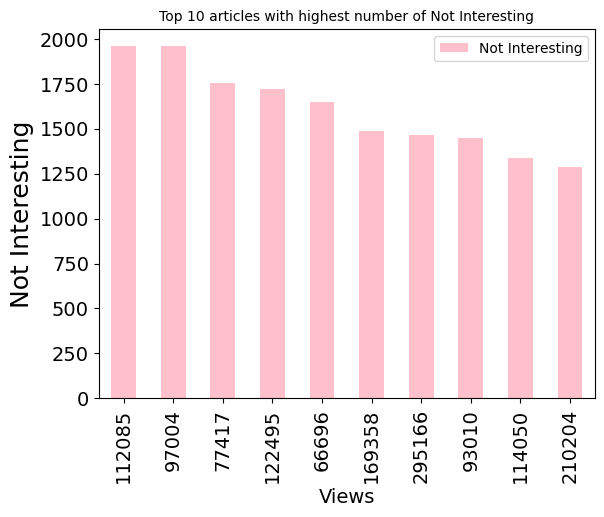

,Name,Type,Views,Not Interesting
3215,אסירה משתקמת: העבודה החדשה של פריסיליה קשתי,פלילי,112085,1956
5138,"סוזן סרנדון: ""ישראל הוציאה להורג את העיתונאית ...",תרבות,97004,1956
1030,התקרית המביכה של רובי ריבלין בטיסת אל על,פוליטי,77417,1752
4742,אנשי התרבות שמסכימים לחשוף למי הם מצביעים בבחי...,תרבות,122495,1722
99,"שרת ההסברה הגיעה לבית העלמין ונאמה על ""ההסתה נ...",פוליטי,66696,1648
642,"נתניהו נאם, הקהל קטע אותו בצעקות: ""מצפצף על הר...",פוליטי,169358,1485
5340,"""מרגיש שהיא רוצה להוציא את עצמה טוב על הגב שלו""",תרבות,295166,1462
2062,"עזה, היום שאחרי: מפנים את ההריסות ומחדשים את מ...",ביטחוני,93010,1449
5200,"ג'יג'י חדיד במסר מפתיע: ""ישראלים חפים מפשע לא ...",תרבות,114050,1338
754,"הסתיימה ההצבעה בפריימריז בליכוד: מי הח""כים שיי...",פוליטי,210204,1289


In [11]:
top10_Not_Interesting = filtered_df[["Name", "Type", "Views", "Not Interesting"]].sort_values("Not Interesting", ascending=False).head(10)
top10_Not_Interesting = top10_Not_Interesting.drop_duplicates(subset='Views')
top10_Not_Interesting.plot.bar(x="Views", y="Not Interesting",title="Top 10 articles with highest number of Not Interesting",fontsize=14,color = 'pink').title.set_size(10)
plt.ylabel("Not Interesting",fontsize=18)
plt.xlabel("Views",fontsize=14) 
plt.show()
top10_Not_Interesting

**Conclusion:** The most not-interesting articles are of a type low and entertainment

Text(0, 0.5, 'Comments')

Text(0.5, 0, 'Views')

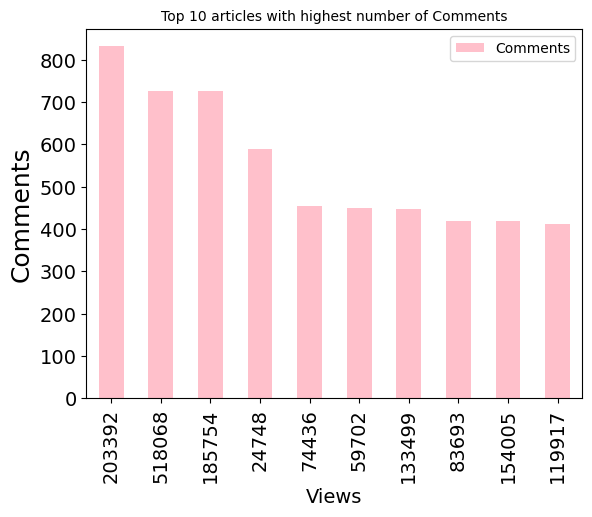

,Name,Type,Views,Comments
4452,"""לא רוצים אותה פה"": תושבי נהריה וקריית מוצקין ...",תרבות,203392,831
1870,זכריה זביידי ואסיר נוסף נלכדו: נמשך המצוד אחר ...,ביטחוני,518068,726
1266,פעולות נקם בחווארה בעקבות הפיגוע: עשרות בתים ו...,ביטחוני,185754,725
4544,"""הם לא מכבדים את העם, למה שאכבד אותם?"": חנן יו...",תרבות,24748,588
4464,"בשידור חי: פיצוץ בין אראל סג""ל לחיים לוינסון",תרבות,74436,454
291,נתניהו במתקפה על המפגינים נגד המהפכה המשפטית: ...,פוליטי,59702,450
4445,"ח""כ טלי גוטליב בהתבטאות מקוממת: ""יהונתן גפן מי...",תרבות,133499,448
120,"""הוא לא יהיה פה"": משתתפי טקס יום השואה הפריעו ...",פוליטי,83693,419
331,"למעלה מ-90 אלף הפגינו בירושלים: ""נילחם עד שננצח""",פוליטי,154005,418
332,סערה חריגה בוועדת החוקה: חברי האופוזיציה הוצאו...,פוליטי,119917,413


In [12]:
top10_Comments = filtered_df[["Name", "Type", "Views", "Comments"]].sort_values("Comments", ascending=False).head(10)
top10_Comments = top10_Comments.drop_duplicates(subset='Views')
top10_Comments.plot.bar(x="Views", y="Comments",title="Top 10 articles with highest number of Comments",fontsize=14,color = 'pink').title.set_size(10)
plt.ylabel("Comments",fontsize=18)
plt.xlabel("Views",fontsize=14) 
plt.show()
top10_Comments

**Conclusion:** The article with the most comments is of a type entertainment

## Meachine Learning
In update_data(df) we calculate new column to predict them in learning

considered an normalized score average for: views, comments, intersetings, not interestings

is_good column calculation is:

((value of views/normalized score average)*((value of Comments/normalized score average)+(value of intersetings/normalized score average)+(value of not interestings/normalized score average))


If is_good_calculate>1

is_good = True

else is_good = False


In [13]:
def update_data(df):
    data = df.copy()
    labels = data["Type"].value_counts().keys()
    is_good_calculate = []
    is_good = []
    views_calc = []
    comments_calc = []
    intersetings_calc = []
    not_interestings_calc = []

    for row_index, row in data.iterrows():
        Views_avg = data.groupby(['Type'])['Views'].mean()[row['Type']]
        Comments_avg = data.groupby(['Type'])['Comments'].mean()[row['Type']]
        Interesting_avg = data.groupby(['Type'])['Interesting'].mean()[row['Type']]
        Not_Interesting_avg = data.groupby(['Type'])['Not Interesting'].mean()[row['Type']]
        calculate = ((row['Views']/Views_avg)*(row['Comments']/Comments_avg)*((row['Interesting']/Interesting_avg)+(row['Not Interesting']/Not_Interesting_avg)))
        views_calc.append(row['Views']/Views_avg)
        comments_calc.append(row['Comments']/Comments_avg)
        intersetings_calc.append(row['Interesting']/Interesting_avg)
        not_interestings_calc.append(row['Not Interesting']/Not_Interesting_avg)
        is_good_calculate.append(calculate)
        is_good.append(calculate > 1)

    data["views_calc"] = views_calc
    data["comments_calc"] = comments_calc
    data["intersetings_calc"] = intersetings_calc
    data["not_interestings_calc"] = not_interestings_calc
    data["is_good_calculate"] = is_good_calculate
    data["is_good"] = is_good

    return data

split the data for trainig (70%) and testing (30%)

In [14]:
updated_data= update_data(filtered_df)

df_copy_learn=updated_data.drop(['Name', 'Type', 'Date', 'Time', 'URL'],axis=1).copy()

df_train = df_copy_learn.sample(frac = 0.7)

df_test= df_copy_learn.drop(df_train.index)

df_copy_learn
df_train
df_test

,Views,Comments,Interesting,Not Interesting,views_calc,comments_calc,intersetings_calc,not_interestings_calc,is_good_calculate,is_good
3,22643,62,502,72,0.597426,1.060131,0.529542,0.553044,0.685656,False
4,54628,39,1165,64,1.441337,0.666857,1.228916,0.491595,1.653696,True
5,21065,12,372,46,0.555791,0.205187,0.392409,0.353334,0.085045,False
6,21151,37,297,24,0.558060,0.632659,0.313295,0.184348,0.175699,False
7,9495,9,266,23,0.250522,0.153890,0.280594,0.176667,0.017629,False
...,...,...,...,...,...,...,...,...,...,...
5423,68555,2,520,138,2.125123,0.088356,1.474785,1.773080,0.609846,False
5424,30546,29,683,23,0.946889,1.281169,1.937073,0.295513,2.708407,True
5425,6919,10,3,0,0.214481,0.441782,0.008508,0.000000,0.000806,False
5426,24833,9,255,45,0.769793,0.397604,0.723212,0.578178,0.398320,False


,Views,Comments,Interesting,Not Interesting,views_calc,comments_calc,intersetings_calc,not_interestings_calc,is_good_calculate,is_good
902,66379,343,1263,421,1.751382,5.864919,1.332293,3.233774,46.901332,True
2388,42132,32,683,84,1.401913,1.201035,0.832011,1.573120,4.049632,True
2018,81626,79,3064,101,2.096525,2.803928,2.999373,2.278528,31.026175,True
2996,16937,3,500,81,0.563567,0.112597,0.609085,1.516937,0.134909,False
2689,35254,15,904,133,1.173053,0.562985,1.101227,2.490773,2.372197,True
...,...,...,...,...,...,...,...,...,...,...
3489,36998,30,667,50,1.185591,1.907910,0.892059,1.262939,4.874607,True
311,31676,9,625,106,0.835758,0.153890,0.659290,0.814204,0.189513,False
5227,110086,29,307,51,3.412534,1.281169,0.870690,0.655269,6.671542,True
1366,10069,12,119,9,0.258618,0.425913,0.116490,0.203037,0.035195,False


,Views,Comments,Interesting,Not Interesting,views_calc,comments_calc,intersetings_calc,not_interestings_calc,is_good_calculate,is_good
3,22643,62,502,72,0.597426,1.060131,0.529542,0.553044,0.685656,False
4,54628,39,1165,64,1.441337,0.666857,1.228916,0.491595,1.653696,True
7,9495,9,266,23,0.250522,0.153890,0.280594,0.176667,0.017629,False
9,32243,55,742,68,0.850718,0.940439,0.782709,0.522320,1.044086,True
17,24773,12,466,54,0.653625,0.205187,0.491566,0.414783,0.121555,False
...,...,...,...,...,...,...,...,...,...,...
5412,3098,1,2,0,0.096034,0.044178,0.005672,0.000000,0.000024,False
5418,7042,1,99,43,0.218294,0.044178,0.280776,0.552482,0.008036,False
5419,19784,15,518,120,0.613280,0.662673,1.469113,1.541809,1.223652,True
5420,153908,51,429,893,4.770964,2.253090,1.216698,11.473628,136.413502,True


We want to predict the value for is_good column.

The column has True/False values and it had calculation backstage.


we will be using 70% of the data to train the model, and the test size will be 30% of the data.

In [15]:
TRAINING_FEATURES = df_train.columns[df_train.columns != 'is_good']
TARGET_FEATURE = ['is_good', 'is_good_calculate']

x = df_train[TRAINING_FEATURES]
y = df_train[TARGET_FEATURE]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30) 


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2172, 9) (2172, 2)
(932, 9) (932, 2)


In [16]:
linear_model_regression = linear_model.LinearRegression()
linear_model_fit = linear_model_regression.fit(x_train, y_train)
lrm_predictions = linear_model_regression.predict(x_test)

In [17]:
print("Final Score is: ", linear_model_fit.score(x_test, y_test))

Final Score is:  0.7771769177640955
